# **Trabajo Practico Sistemas de ecuaciones diferenciales y Estabilidad**
**Grupo:** 17

**ACTIVIDADES**

**Integrantes:**


*   Aguirre Arteaga, Jaider Camilo
*   Bianciotto, Joaquin
*   Petraccaro, Maximiliano


**PARTE 1**

*1*

*Resolucion de sistemas de ecuaciones diferenciales homogenios*

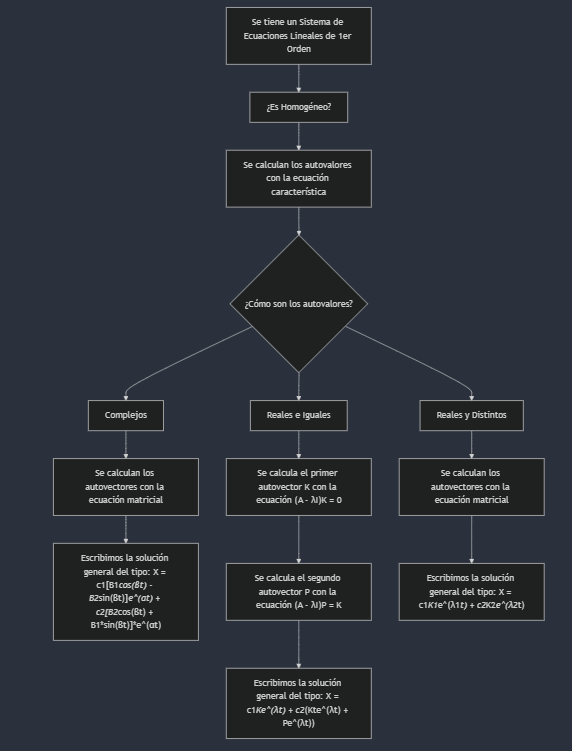

*Resolucion de sistemas de ecuaciones diferenciales no homogeneos*

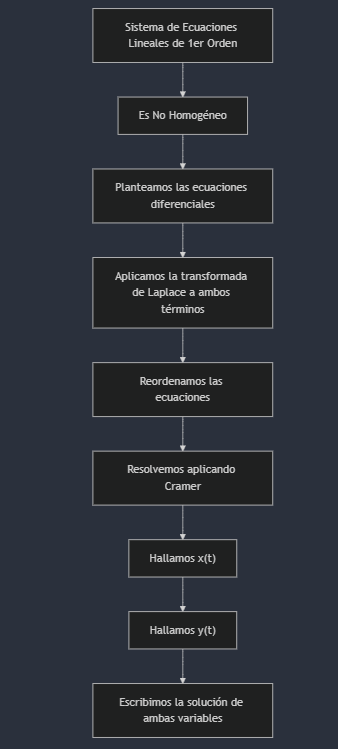

*Resolucion de sistemas de ecuaciones diferenciales no homogeneos con variacion de parametros*

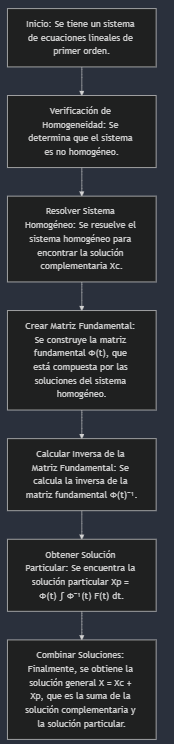

*2*



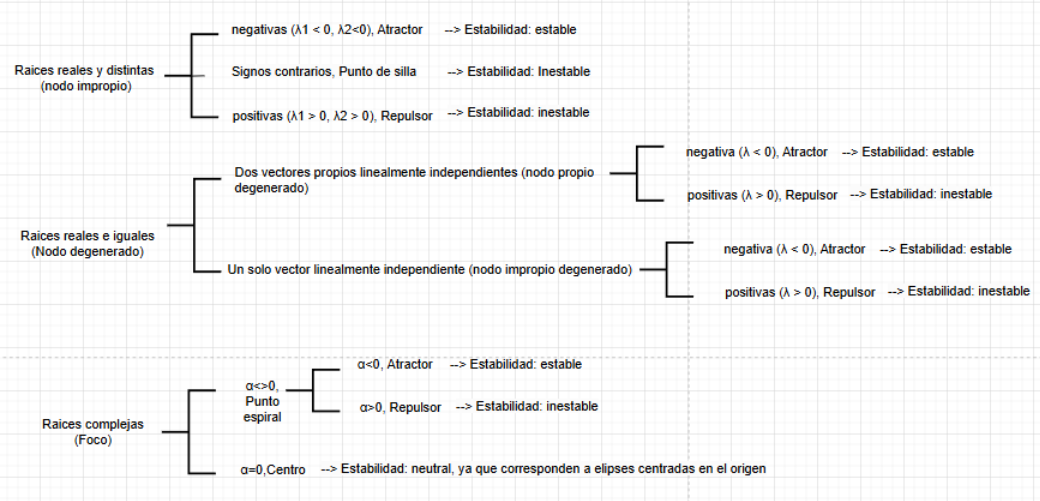

**PARTE 2**

1

Ejercicio 3.a)

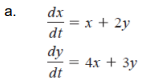

In [ ]:
import sympy as sp


t = sp.symbols('t')
x, y = sp.symbols('x y')


A = sp.Matrix([[sp.Rational(1, 2), 2], [sp.Rational(4, 3), -2]])

# Calcular autovalores de la matriz
eigenvalues = A.eigenvals()

print("Autovalores y autovectores:\n")

v1, v2 = None, None
k1, k2 = sp.symbols('k1 k2')


for i, eigenvalue in enumerate(eigenvalues):
    print(f"Para λ = {eigenvalue}:")

    # Calcular A - λI
    A_lambda_I = A - eigenvalue * sp.eye(2)
    print("Matriz (A - λI):")
    sp.pprint(A_lambda_I)


    eq1 = A_lambda_I[0, 0] * k1 + A_lambda_I[0, 1] * k2
    eq2 = A_lambda_I[1, 0] * k1 + A_lambda_I[1, 1] * k2
    solution = sp.solve([eq1.subs(k2, 1), eq2.subs(k2, 1)], k1)

   
    if solution:
        autovector = sp.Matrix([solution[k1], 1])
    else:
        autovector = sp.Matrix([0, 1])  

    
    print("Autovector:")
    sp.pprint(autovector)
    print("\n")

    if i == 0:
        v1 = autovector
    else:
        v2 = autovector


C1, C2 = sp.symbols('C1 C2')

lambda1, lambda2 = list(eigenvalues.keys())


print("\nSolución general:")
print(f"X(t) = {C1} * e^({lambda1} * t) * {v1} + {C2} * e^({lambda2} * t) * {v2}")


print("\nAnálisis de estabilidad:")
stable = True
for i, eigenvalue in enumerate([lambda1, lambda2]):
    print(f"λ{i+1}: {eigenvalue}")
    if eigenvalue >= 0:  
        stable = False

if stable:
    print("El sistema es estable ")
else:
    print("El sistema es inestable.")


Autovalores y autovectores:

Para λ = -sqrt(609)/12 - 3/4:
Matriz (A - λI):
⎡5   √609            ⎤
⎢─ + ────      2     ⎥
⎢4    12             ⎥
⎢                    ⎥
⎢            5   √609⎥
⎢  4/3     - ─ + ────⎥
⎣            4    12 ⎦
Autovector:
⎡15   √609⎤
⎢── - ────⎥
⎢16    16 ⎥
⎢         ⎥
⎣    1    ⎦


Para λ = -3/4 + sqrt(609)/12:
Matriz (A - λI):
⎡5   √609            ⎤
⎢─ - ────      2     ⎥
⎢4    12             ⎥
⎢                    ⎥
⎢            √609   5⎥
⎢  4/3     - ──── - ─⎥
⎣             12    4⎦
Autovector:
⎡15   √609⎤
⎢── + ────⎥
⎢16    16 ⎥
⎢         ⎥
⎣    1    ⎦



Solución general:
X(t) = C1 * e^(-sqrt(609)/12 - 3/4 * t) * Matrix([[15/16 - sqrt(609)/16], [1]]) + C2 * e^(-3/4 + sqrt(609)/12 * t) * Matrix([[15/16 + sqrt(609)/16], [1]])

Análisis de estabilidad:
λ1: -sqrt(609)/12 - 3/4
λ2: -3/4 + sqrt(609)/12
El sistema es inestable (al menos un autovalor es no negativo).


Funcion grafica de los campos vectoriales asociados y las funciones solucion

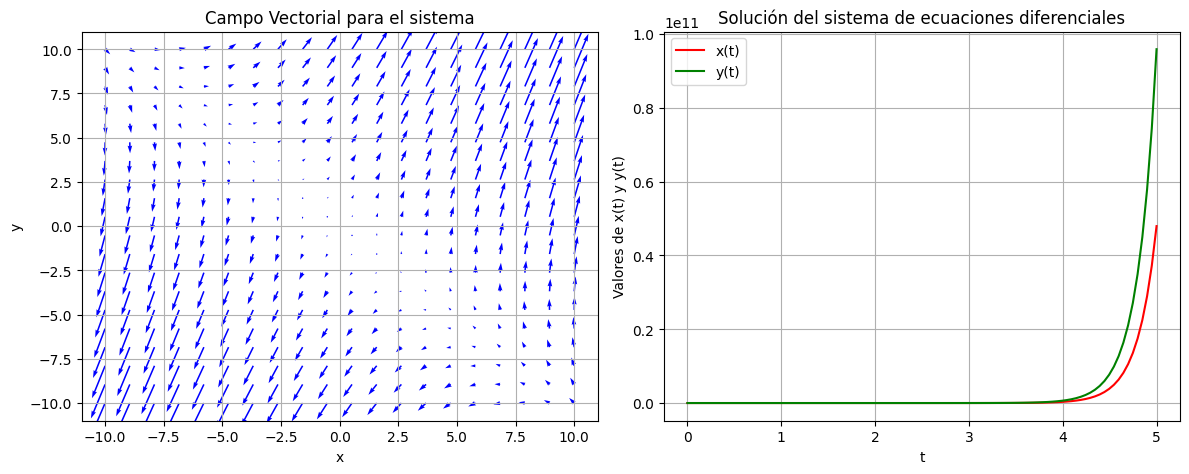

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Definir la función del sistema de ecuaciones diferenciales
def system(t, z):
    x, y = z
    dxdt = x + 2*y
    dydt = 4*x + 3*y
    return [dxdt, dydt]

# Condiciones iniciales para la solución
x0, y0 = 1, 1  # Puedes cambiar estos valores
t_span = (0, 5)
t_eval = np.linspace(0, 5, 100)

# Resolver el sistema de ecuaciones diferenciales
sol = solve_ivp(system, t_span, [x0, y0], t_eval=t_eval)


# Graficar el campo vectorial
x_vals = np.linspace(-10, 10, 20)
y_vals = np.linspace(-10, 10, 20)
X, Y = np.meshgrid(x_vals, y_vals)
U = X + 2*Y
V = 4*X + 3*Y

plt.figure(figsize=(12, 5))

# Subplot 1: Campo vectorial
plt.subplot(1, 2, 1)
plt.quiver(X, Y, U, V, color='b')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Campo Vectorial para el sistema")
plt.grid()

# Subplot 2: Solución del sistema en función del tiempo
plt.subplot(1, 2, 2)
plt.plot(sol.t, sol.y[0], label="x(t)", color="r")
plt.plot(sol.t, sol.y[1], label="y(t)", color="g")
plt.xlabel("t")
plt.ylabel("Valores de x(t) y y(t)")
plt.title("Solución del sistema de ecuaciones diferenciales")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


4.6)

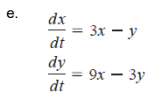

In [ ]:
import sympy as sp

# Definir las variables simbólicas
t = sp.symbols('t')
x, y = sp.symbols('x y')

# Definir la matriz de coeficientes del sistema
A = sp.Matrix([[3, -1], [9, -3]])

# Calcular autovalores de la matriz
eigenvalues = A.eigenvals()

# Mostrar los autovalores y resolver manualmente los sistemas para obtener autovectores
print("Autovalores y autovectores:\n")

# Obtener el autovalor (único con multiplicidad 2)
lambda_val = list(eigenvalues.keys())[0]  # Autovalor con multiplicidad 2
k1, k2 = sp.symbols('k1 k2')

# Calcular autovector para el autovalor
A_lambda_I = A - lambda_val * sp.eye(2)
print(f"Para λ = {lambda_val}:")
print("Matriz (A - λI):")
sp.pprint(A_lambda_I)

# Resolver el sistema para obtener el autovector, con k2 = 2
eq1 = A_lambda_I[0, 0] * k1 + A_lambda_I[0, 1] * k2
eq2 = A_lambda_I[1, 0] * k1 + A_lambda_I[1, 1] * k2
solution = sp.solve([eq1.subs(k2, 2), eq2.subs(k2, 2)], k1)

# Obtener el autovector asignando k2 = 2
if solution:
    K = sp.Matrix([solution[k1], 2])
else:
    K = sp.Matrix([0, 1])  # En caso de que no haya solución específica para k1

# Mostrar el autovector
print("Autovector K:")
sp.pprint(K)
print("\n")

# Calcular el vector generalizado P resolviendo (A - λI) P = K
p1, p2 = sp.symbols('p1 p2')
eq1 = A_lambda_I[0, 0] * p1 + A_lambda_I[0, 1] * p2 - K[0]
eq2 = A_lambda_I[1, 0] * p1 + A_lambda_I[1, 1] * p2 - K[1]

# Mostrar el sistema de ecuaciones para P
print("Sistema para el vector generalizado P:")
system_matrix = sp.Matrix([[A_lambda_I[0, 0], A_lambda_I[0, 1], K[0]],
                           [A_lambda_I[1, 0], A_lambda_I[1, 1], K[1]]])
sp.pprint(system_matrix)

# Resolver el sistema para P
solution = sp.solve([eq1, eq2], (p1, p2))

# Verificar si se encontró una solución para P
if isinstance(solution, dict) and p1 in solution and p2 in solution:
    P = sp.Matrix([solution[p1], solution[p2]])
else:
    P = sp.Matrix([1, 0])  # En caso de que no haya solución específica

# Mostrar el vector generalizado
print("Vector generalizado P:")
sp.pprint(P)
print("\n")

# Crear las constantes arbitrarias para la solución general
C1, C2 = sp.symbols('C1 C2')

# Expresar la solución general en el formato solicitado
print("\nSolución general en el formato solicitado:")
print(f"X(t) = {C1} * e^({lambda_val} * t) * {K} + {C2} * (t * e^({lambda_val} * t) * {K} + e^({lambda_val} * t) * {P})")

# Analizar estabilidad
print("\nAnálisis de estabilidad:")
stable = True
print(f"λ: {lambda_val}")
if lambda_val >= 0:  # Evaluar la estabilidad
    stable = False

if stable:
    print("El sistema es estable.")
else:
    print("El sistema es inestable.")


Autovalores y autovectores:

Para λ = 0:
Matriz (A - λI):
⎡3  -1⎤
⎢     ⎥
⎣9  -3⎦
Autovector K:
⎡2/3⎤
⎢   ⎥
⎣ 2 ⎦


Sistema para el vector generalizado P:
⎡3  -1  2/3⎤
⎢          ⎥
⎣9  -3   2 ⎦
Vector generalizado P:
⎡1⎤
⎢ ⎥
⎣0⎦



Solución general en el formato solicitado:
X(t) = C1 * e^(0 * t) * Matrix([[2/3], [2]]) + C2 * (t * e^(0 * t) * Matrix([[2/3], [2]]) + e^(0 * t) * Matrix([[1], [0]]))

Análisis de estabilidad:
λ: 0
El sistema es inestable (el autovalor es positivo).


Grafico

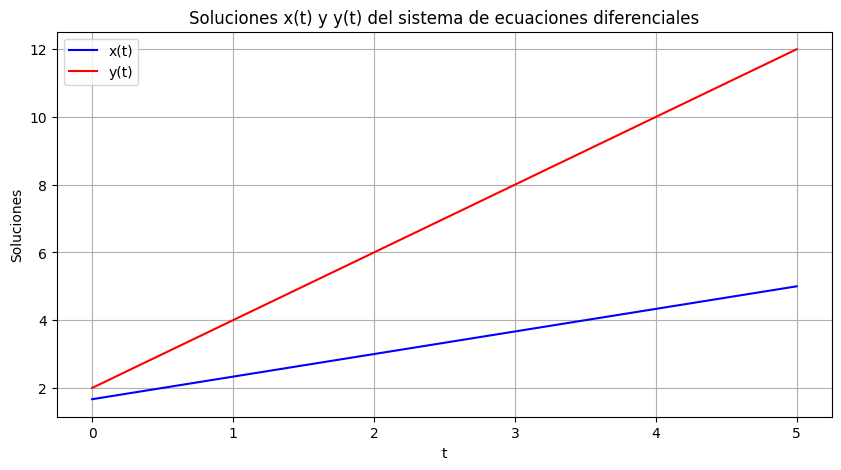

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


C1_val = 1
C2_val = 1

x_t = C1 * sp.exp(lambda_val * t) * K[0] + C2 * (t * sp.exp(lambda_val * t) * K[0] + sp.exp(lambda_val * t) * P[0])
y_t = C1 * sp.exp(lambda_val * t) * K[1] + C2 * (t * sp.exp(lambda_val * t) * K[1] + sp.exp(lambda_val * t) * P[1])


x_t_func = sp.lambdify(t, x_t.subs({C1: C1_val, C2: C2_val}), modules="numpy")
y_t_func = sp.lambdify(t, y_t.subs({C1: C1_val, C2: C2_val}), modules="numpy")


time = np.linspace(0, 5, 400)
x_vals = x_t_func(time)
y_vals = y_t_func(time)

plt.figure(figsize=(10, 5))
plt.plot(time, x_vals, label='x(t)', color='blue')
plt.plot(time, y_vals, label='y(t)', color='red')
plt.xlabel('t')
plt.ylabel('Soluciones')
plt.title('Soluciones x(t) y y(t) del sistema de ecuaciones diferenciales')
plt.legend()
plt.grid(True)
plt.show()

5.i)

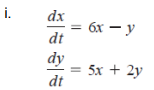

In [11]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Definir las variables simbólicas
t = sp.symbols('t')
x, y = sp.symbols('x y')

# Definir la matriz de coeficientes del sistema
A = sp.Matrix([[6, -1], [5, 2]])

# Calcular los autovalores de la matriz
eigenvalues = A.eigenvals()

# Obtener el primer autovalor
lambda_val = list(eigenvalues.keys())[0]

# Definir las variables para el autovector
k1, k2 = sp.symbols('k1 k2')

# Calcular la matriz (A - λI) para el primer autovalor
A_lambda_I = A - lambda_val * sp.eye(2)
#print(f"Para λ = {lambda_val}:")
#print("Matriz (A - λI):")
sp.pprint(A_lambda_I)

# Resolver el sistema para obtener el autovector
eq1 = A_lambda_I[0, 0] * k1 + A_lambda_I[0, 1] * k2
eq2 = A_lambda_I[1, 0] * k1 + A_lambda_I[1, 1] * k2
solution = sp.solve([eq1, eq2], (k1, k2), dict=True)

# Obtener el autovector (k1, k2)
if solution:
    k1_value = solution[0].get(k1, 1)
    k2_value = solution[0].get(k2, 0)
else:
    k1_value = 1
    k2_value = 0  # En caso de que no haya solución específica

# Mostrar el autovector
print(f"Autovector K: k1 = {k1_value}, k2 = {k2_value}\n")

# Mostrar el autovalor
print(f"Autovalor λ: {lambda_val}")

# Definir las constantes c1 y c2
c1, c2 = sp.symbols('c1 c2')

# Expresar X1(t) y X2(t) sin descomponer el autovalor
X1 = f"X1(t) = {k1_value} * e^({lambda_val} * t)"
X2 = f"X2(t) = {k2_value} * e^({lambda_val} * t)"

print("Solución general en el formato solicitado:")
print(X1)
print(X2)




# Analizar estabilidad
print("\nAnálisis de estabilidad:")
stable = True
real_part = sp.re(lambda_val)  # Obtener la parte real del autovalor
if real_part >= 0:  # Evaluar la estabilidad usando solo la parte real
    stable = False

if stable:
    print("El sistema es estable")
else:
    print("El sistema es inestable")




⎡2 + ⅈ    -1  ⎤
⎢             ⎥
⎣  5    -2 + ⅈ⎦
Autovector K: k1 = k2*(2/5 - I/5), k2 = 0

Autovalor λ: 4 - I
Solución general en el formato solicitado:
X1(t) = k2*(2/5 - I/5) * e^(4 - I * t)
X2(t) = 0 * e^(4 - I * t)

Análisis de estabilidad:
El sistema es inestable


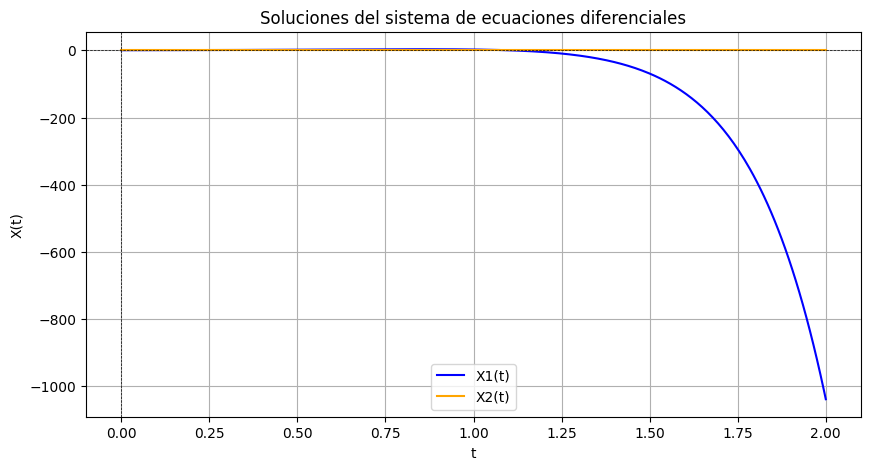

In [10]:
# grafico de los campos vectoriales asociados y de las funciones solucion

k1_value = (2/5) - sp.I/5
a = 4  # Parte real del autovalor
b = -1  # Parte imaginaria del autovalor
B1 = k1_value  # Valor de k1 (autovector)
B2 = 0  # Valor de k2 (autovector)


B1_real = B1.as_real_imag()[0]
B1_imag = B1.as_real_imag()[1]
B2_real = B2
B2_imag = 0


def X1(t):
    return (B1_real * np.cos(b * t) - B1_imag * np.sin(b * t)) * np.exp(a * t)

def X2(t):
    return (B2_real * np.cos(b * t) + B2_imag * np.sin(b * t)) * np.exp(a * t)


t_values = np.linspace(0, 2, 400)


X1_values = X1(t_values)
X2_values = X2(t_values)

# Graficar las soluciones
plt.figure(figsize=(10, 5))
plt.plot(t_values, X1_values, label='X1(t)', color='blue')
plt.plot(t_values, X2_values, label='X2(t)', color='orange')
plt.title('Soluciones del sistema de ecuaciones diferenciales')
plt.xlabel('t')
plt.ylabel('X(t)')
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.grid()
plt.legend()
plt.show()

6.b)

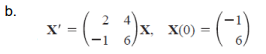

In [12]:
import numpy as np
from sympy import *
#definimos las variables y funciones
t = symbols('t')
x= symbols('x', cls=Function)
y = symbols('y', cls=Function)
dx_dt=Eq(x(t).diff(t), 2*x(t)+4*y(t))
dx_dt

Eq(Derivative(x(t), t), 2*x(t) + 4*y(t))

In [13]:
dy_dt=Eq(y(t).diff(t), -1*x(t)+6*y(t))
dy_dt

Eq(Derivative(y(t), t), -x(t) + 6*y(t))

In [14]:
eq=(dx_dt,dy_dt)
eq


(Eq(Derivative(x(t), t), 2*x(t) + 4*y(t)),
 Eq(Derivative(y(t), t), -x(t) + 6*y(t)))

In [15]:
sol1=dsolve(eq)
sol1[0]

Eq(x(t), -2*C2*t*exp(4*t) - (2*C1 - C2)*exp(4*t))

*2*

sistema no homogéneos por el método de variación de parámetros.


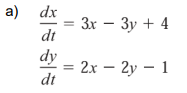

In [16]:
import numpy as np
from sympy import *
#resuelva el siguiente sistema no homogéneos por el método de variación de parámetros.
t = symbols('t')
x= symbols('x', cls=Function)
y = symbols('y', cls=Function)
phi = symbols('phi', cls=Function)
c1, c2 = symbols('c1 c2')

In [17]:
coeficientes = Matrix([[3, -3], [2, -2]])
resultados = Matrix([4, -1])
autovectores = coeficientes.eigenvects()
#autovector tiene como estructura: ([autovalor, multiplicidad, [autovectore]],...)
autovectores[0][0]

0

In [18]:
s1 = autovectores[0][2][0]*exp(autovectores[0][0]*t)
s2 = autovectores[1][2][0]*exp(autovectores[1][0]*t)
phi = Matrix([[s1[0], s2[0]*2], [s1[1], s2[1]*2]])
phi_inv = phi.inv()
display(phi,phi_inv)

Matrix([
[1, 3*exp(t)],
[1, 2*exp(t)]])

Matrix([
[     -2,        3],
[exp(-t), -exp(-t)]])

In [20]:
#calculo Xp = phi*integral(phi^-1*F(t)dt)

Xp = phi*integrate(phi_inv*resultados,t)
Xp

Matrix([
[-11*t - 15],
[-11*t - 10]])

In [21]:
#solucion general x(t) = Xh + Xp
constantes = Matrix([c1, c2])
X = phi*constantes+Xp
X

Matrix([
[c1 + 3*c2*exp(t) - 11*t - 15],
[c1 + 2*c2*exp(t) - 11*t - 10]])

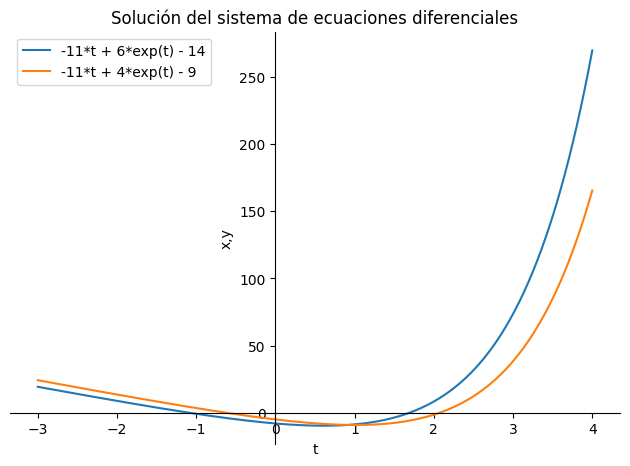

In [22]:

# Reemplazar las constantes de integración por valores específicos
X_reemplazado = X.subs({c1: 1, c2: 2})

# Graficar la solución con las constantes reemplazadas
plot(X_reemplazado[0],X_reemplazado[1], (t, -3, 4), ylabel='x,y', xlabel='t',legend=True,title='Solución del sistema de ecuaciones diferenciales')

*3*

8.a

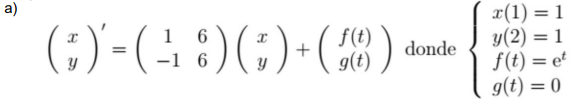

In [23]:
import numpy as np
from sympy import *

t = symbols('t')
s = symbols('s')
x= symbols('x', cls=Function)
y = symbols('y', cls=Function)
X, Y = symbols('X Y', cls = Function)
c1, c2 = symbols('c1 c2')

In [24]:
coeficientes = Matrix([[1, 6], [-1, 6]])
resultador = Matrix([exp(t), 0])
condicionesIniciales = {x(0):1,y(0):1}

In [25]:
eqx = Eq(x(t).diff(t),x(t)+6*y(t)+exp(t))
eqy= Eq(y(t).diff(t),-x(t)+6*y(t)+0)
display(eqx,eqy)

Eq(Derivative(x(t), t), x(t) + 6*y(t) + exp(t))

Eq(Derivative(y(t), t), -x(t) + 6*y(t))

In [26]:
laplaceX = Eq(laplace_transform(eqx.lhs,t,s,noconds=True),laplace_transform(eqx.rhs,t,s,noconds=True))
laplaceY = Eq(laplace_transform(eqy.lhs,t,s,noconds=True),laplace_transform(eqy.rhs,t,s,noconds=True))
laplaceY = laplaceY.subs(condicionesIniciales)
laplaceX = laplaceX.subs(condicionesIniciales)


In [27]:
laplaceX = laplaceX.subs({laplace_transform(x(t),t,s,noconds=True): X(s),laplace_transform(y(t),t,s,noconds=True): Y(s)})
laplaceY = laplaceY.subs({laplace_transform(x(t),t,s,noconds=True): X(s),laplace_transform(y(t),t,s,noconds=True): Y(s)})

In [28]:
sistema = (laplaceX,laplaceY)
display(sistema[0],sistema[1])

Eq(s*X(s) - 1, X(s) + 6*Y(s) + 1/(s - 1))

Eq(s*Y(s) - 1, -X(s) + 6*Y(s))

In [29]:
solucion = solve(sistema, [X(s), Y(s)])


In [30]:
display(solucion[X(s)],solucion[Y(s)])  

(s**2 - 6)/(s**3 - 8*s**2 + 19*s - 12)

(s**2 - 3*s + 1)/(s**3 - 8*s**2 + 19*s - 12)

In [31]:
#para facilitar el calculo de la inversa de laplace, utililizaremos las fracciones parciales
solucion[X(s)] = apart(solucion[X(s)],s)
solucion[Y(s)] = apart(solucion[Y(s)],s)
display(solucion[X(s)],solucion[Y(s)])

-5/(6*(s - 1)) - 3/(2*(s - 3)) + 10/(3*(s - 4))

-1/(6*(s - 1)) - 1/(2*(s - 3)) + 5/(3*(s - 4))

In [32]:
#calculamos la inversa de laplace
solucion[X(s)] = inverse_laplace_transform(solucion[X(s)],s,t,conds=None)
solucion[Y(s)] = inverse_laplace_transform(solucion[Y(s)],s,t,conds=None)
display(solucion[X(s)],solucion[Y(s)])

10*exp(4*t)*Heaviside(t)/3 - 3*exp(3*t)*Heaviside(t)/2 - 5*exp(t)*Heaviside(t)/6

5*exp(4*t)*Heaviside(t)/3 - exp(3*t)*Heaviside(t)/2 - exp(t)*Heaviside(t)/6

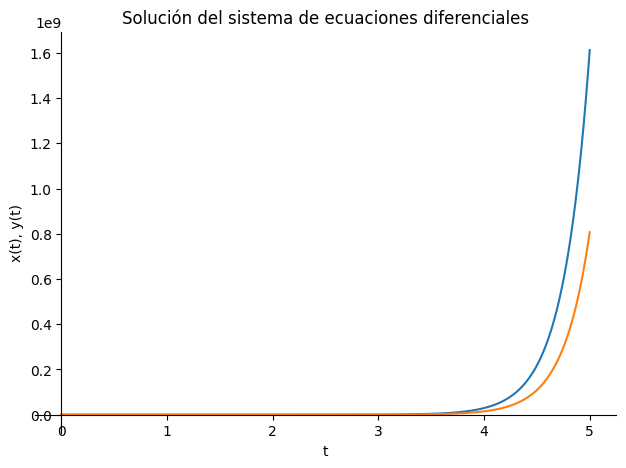

In [33]:
#graficamos la solución
plot(solucion[X(s)],solucion[Y(s)],(t,0,5), title = 'Solución del sistema de ecuaciones diferenciales', xlabel = 't', ylabel = 'x(t), y(t)')

*4*

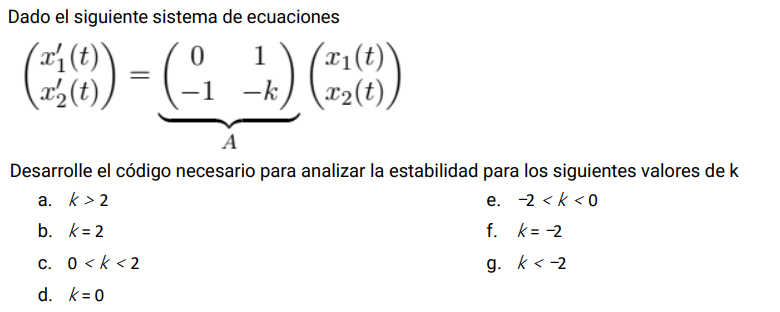

In [34]:
import numpy as np
import sympy as sp
# Definimos el Simbolo k 
k = sp.Symbol('k')

Xp = sp.Matrix([['Xp1(t)'],['Xp2(t)']])
X = sp.Matrix([['X1(t)'],['X2(t)']])
A = sp.Matrix([[0,1],[-1,-k]])

print ('Dado el sistema de ecuaciones\n')
print (Xp,'=',A,'*',X)

Dado el sistema de ecuaciones

Matrix([[Xp1(t)], [Xp2(t)]]) = Matrix([[0, 1], [-1, -k]]) * Matrix([[X1(t)], [X2(t)]])


In [35]:
print('Donde la matriz A es igual a:')
A

Donde la matriz A es igual a:


Matrix([
[ 0,  1],
[-1, -k]])

In [36]:
import numpy as np

# Función para calcular los valores propios de la matriz A
def calcular_valores_propios(k):
    # Definimos la matriz A, ahora en numpy
    A = np.array([[0, 1], [-1, -k]])
    # Calculamos los valores propios
    valores_propios = np.linalg.eigvals(A)
    return valores_propios

print ('Los valores que le daremos a k serán:\n')
print ('a) K > 2 --> K=3\n')
print ('b) K = 2\n')
print ('c) 0 < K < 2 --> K=1 \n')
print ('d) K=0\n')
print ('e) -2 < K < 0 --> K=-1\n')
print ('f) K = -2\n')
print ('g) K < -2 --> K=-3\n')

# Valores de k para analizar
valores_k = [3, 2, 1, 0, -1, -2, -3]

# Analizar la estabilidad para cada valor de k
for k in valores_k:
    valores_propios = calcular_valores_propios(k)
    print(f"Para k = {k}, los valores propios son: {valores_propios}")
    #No posee parte Imaginaria
    if (valores_propios[0].imag == 0):
        #Valores reales Distintos 
        if (valores_propios[0] !=  valores_propios[1]):
                if (valores_propios[0] < 0) and (valores_propios[1] < 0):
                    print ('El nodo es estable\n')
                elif (valores_propios[0] > 0) and (valores_propios[1] < 0):
                    print ('El nodo es inestable\n')
                elif (valores_propios[0] < 0) and (valores_propios[1] > 0) or (valores_propios[0] > 0) and (valores_propios[1] < 0):
                    print ('Es un punto de silla\n')
        # Valores Reales Iguales
        elif (valores_propios.real[0] == valores_propios.real[1]):
            if (valores_propios[0] < 0):
                print ('El nodo es estable\n')
            else:
                print ('El nodo es inestable\n')
        
    #Valores Imaginarios
    else:
        if (valores_propios.real[0] !=  0 ):
                if (valores_propios.real[0]<0):
                    print ('El nodo es estable\n')
                else:
                    print('El nodo es inestable\n')
        else:
            print ('Nodo centro\n')
            
        
   
    

Los valores que le daremos a k serán:

a) K > 2 --> K=3

b) K = 2

c) 0 < K < 2 --> K=1 

d) K=0

e) -2 < K < 0 --> K=-1

f) K = -2

g) K < -2 --> K=-3

Para k = 3, los valores propios son: [-0.38196601 -2.61803399]
El nodo es estable

Para k = 2, los valores propios son: [-1. -1.]
El nodo es estable

Para k = 1, los valores propios son: [-0.5+0.8660254j -0.5-0.8660254j]
El nodo es estable

Para k = 0, los valores propios son: [0.+1.j 0.-1.j]
Nodo centro

Para k = -1, los valores propios son: [0.5+0.8660254j 0.5-0.8660254j]
El nodo es inestable

Para k = -2, los valores propios son: [1. 1.]
El nodo es inestable

Para k = -3, los valores propios son: [0.38196601 2.61803399]


*5*

Encuentre una función de Lyapunov para los siguientes sistemas lineales y
determine su estabilidad.

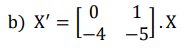

Matriz de coeficientes: 
Matrix([[0, 1], [-4, -5]])

Solución de la ecuación de Lyapunov ((A.T*M)+(M*A) = -N) siendo N la matriz identidad:
Matrix([[9/8], [1/8], [1/8]])

Resultando así la matriz M de Lyapunov como:
Matrix([[9/8, 1/8], [1/8, 1/8]])

Función de Lyapunov(V(x)=x.T*M*x):
 Matrix([[x1*(9*x1/8 + x2/8) + x2*(x1/8 + x2/8)]])

Autovalores de M: 
[5/8 - sqrt(17)/8, sqrt(17)/8 + 5/8]

Entonces el sistema es asintóticamente estable


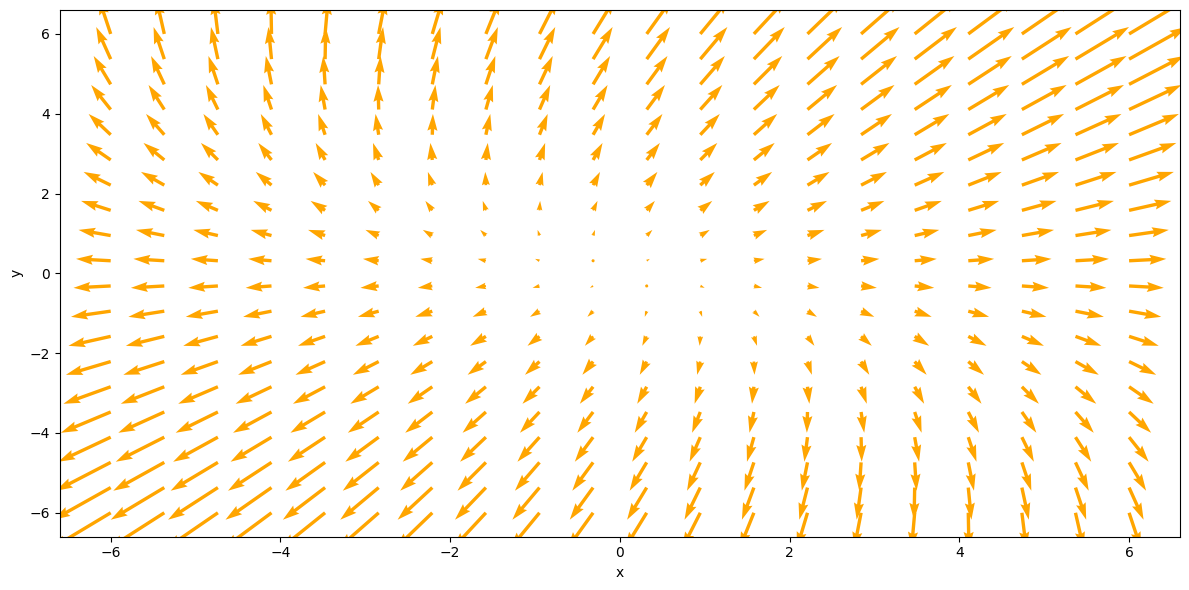

In [37]:
from sympy import symbols, Matrix
import numpy as np
import matplotlib.pyplot as plt
# Definir la variable y la matriz del sistema
t = symbols('t')
k = symbols('k')
a=symbols('a')
b=symbols('b')
c=symbols('c')
d=symbols('d')
x1=symbols('x1')
x2=symbols('x2')
A = Matrix([[0,1], [-4, -5]])
print(f'Matriz de coeficientes: \n{A}\n')

M = Matrix([[a,b],[b,c]])
T1=A.T*M
T2=M*A
P=T1+T2

#Expresamos en términos matriciales el sistema de ecuaciones asociado a la matriz M de la ecuación de Lyapunov.
matrizM = []
for element in P:
    matrizM.append([element.coeff(var) for var in [a, b, c]])
matrizM = Matrix(matrizM)
solucion=matrizM.solve(Matrix([-1, 0,0,-1]))
print(f'Solución de la ecuación de Lyapunov ((A.T*M)+(M*A) = -N) siendo N la matriz identidad:\n{solucion}\n')

x=Matrix([x1,x2])

M=M.subs({a: solucion[0], b: solucion[1], c: solucion[2]})
print(f'Resultando así la matriz M de Lyapunov como:\n{M}\n')

v=x.T*M*x
print(f'Función de Lyapunov(V(x)=x.T*M*x):\n {v}\n')

autovalores=list(M.eigenvals().keys()) #Los autovalores de la matriz M de la ecuación de Lyapunov
print(f'Autovalores de M: \n{autovalores}\n')


if autovalores[0]>0 and autovalores[1]>0:
    print('Entonces el sistema es asintóticamente estable')
elif autovalores[0]<0 or autovalores[1]<0:
    print('Como además de ser un sistema lineal, es invariante en el tiempo, entonces se puede afirmar que es un sistema inestable.')


x_vals = np.linspace(-6, 6, 20)
y_vals = np.linspace(-6, 6, 20)
X, Y = np.meshgrid(x_vals, y_vals)


U = 3 * X +2*Y
V = 0 * X + 3 * Y

plt.figure(figsize=(12, 6))
plt.quiver(X, Y, U, V, color="orange")
plt.xlabel("x")
plt.ylabel("y")
plt.tight_layout()
plt.show()